# M2 13 August 2018
### Michael Triner

(1) 

 Data Science combines statistice with computer science. It utilizes computers to more efficiently sort through and organize data
 
 I will hopefully be using Data Science for my capstone this semester as well as the next

(2)

Exploration - input, manipulate, summarize and visualize data

Inference - draw conclusions about populations based off sampled data

Prediction - make sound predictions based on collected data

## The next few cells are basic mathematics operations and printing a statement with a thumbs up, which has the unicode \N{THUMBS UP SIGN} for python

In [4]:
# (4)a
2+2



4

In [5]:
# (4)b
5*2

10

In [6]:
# (4)c
5/2

2.5

In [17]:
# (5) 
print("Michael Triner \N{THUMBS UP SIGN}")


Michael Triner 👍


(6)

There is a relationship, but it is not causal. That is, increased ice cream sales does not cause increased violent crime. Ice cream sales would just be a confounding variable.

(7)

In an observational study, the researcher is simply observing natural events as they occur, usually without a control. In an actual experiement there is usually a control group and a treatment group being researched in a controlled environment.

# M3 15 August 2018

In [2]:
import numpy as np
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

To get the seconds in June I multiply the days in June by the seconds in a day (86,400)

In [33]:
# (2)

days_in_June = 30
seconds_in_June = 86400*30
seconds_in_June

2592000

To figure out how many seconds from the given day and time in June to the given day and time in August I add all the days then multiply by the seconds in a day

In [34]:
from_June = 29.5
from_July = 31
from_August = 14 + (9.5/24)
total_days = from_June + from_July + from_August
total_Seconds = total_days * 86400
total_Seconds

6471000.0

Reading in a table from an excel spreadsheet then using the where function to find the population growth between 1950 and 2015

In [35]:
# (3)

world_pop = Table.read_table('world_population.csv')

In [36]:
world_pop.where('Year',2015)

Population,Year,Annual Growth Rate
7256490011,2015,0.010833


In [37]:
world_pop.where('Year',1950)

Population,Year,Annual Growth Rate
2557628654,1950,nan


In [39]:
PopGrowth_50_to_2015 = (7256490011-2557628654)
PopGrowth_50_to_2015

4698861357

The below function will give the average growth rate: (after/before)^(1/time passed) -1

In [42]:
avg_growthRate = (7256490011/2557628654) ** (1/(2015-1950)) -1
avg_growthRate

0.01617270380658975

The next reads in data from a web address about the Titanic and then shows the table

In [3]:
# (4)

Titanic = Table.read_table('https://raw.githubusercontent.com/oikobill/Kaggle/master/Titanic/data/train.csv')

Titanic = Titanic.relabeled('Pclass','passenger_class')

Titanic = Titanic.with_column('Family_Size',Titanic['SibSp']+Titanic['Parch'])

Titanic


PassengerId,Survived,passenger_class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,nan,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C,1
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,nan,S,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S,1
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,nan,S,0
6,0,3,"Moran, Mr. James",male,nan,0,0,330877,8.4583,nan,Q,0
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,0
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,nan,S,4
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,nan,S,2
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,nan,C,1


Creating a bar graph that counts the number of people in each passenger class

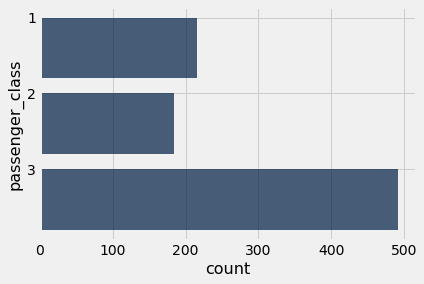

In [80]:
Titanic.group("passenger_class").barh('passenger_class','count')

Next sorts the age in ascending order and displays the 5 youngest passengers

In [81]:
AgeYoung_Titanic = Titanic.sort('Age')
AgeYoung_Titanic.show(5)

PassengerId,Survived,passenger_class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size
804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,nan,C,1
756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5,nan,S,2
470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,nan,C,3
645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,nan,C,3
79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29,nan,S,2


Next sorts the table by age in descending order, the are.above(0) makes sure that there is an actual number value associated with the age and then shows the 5 oldest passengers

In [144]:
AgeOld_Titanic = Titanic.sort('Age',descending = True)

AgeOld_Titanic = AgeOld_Titanic.where('Age',are.above(0))
AgeOld_Titanic.show(5)

PassengerId,Survived,passenger_class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size
631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80,0,0,27042,30,A23,S,0
852,0,3,"Svensson, Mr. Johan",male,74,0,0,347060,7.775,nan,S,0
494,0,1,"Artagaveytia, Mr. Ramon",male,71,0,0,PC 17609,49.5042,nan,C,0
97,0,1,"Goldschmidt, Mr. George B",male,71,0,0,PC 17754,34.6542,A5,C,0
117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.75,nan,Q,0


In [6]:
class_count = Titanic.group('passenger_class')  #Counts the number of passengers in each class

class_count = class_count.column('count') #Takes only the count of each class
survival = Titanic.select('passenger_class','Survived').where('Survived', are.above(0)).group("passenger_class").relabeled('count','Survived')
#Above makes a table survival only taking the columns passenger class and survived where only people who survived are taken and then group counts how many
#in each class survived and then the count column is relabled to be called survived
survive_count = survival.column('Survived') #makes an array of the total survived in each class
survive_rate = survive_count/class_count # creates an array of the survival rate of each class

survival = survival.with_column('Survival_Rate',survive_rate) #adds the survival rate to the table Survival we made
survival

passenger_class,Survived,Survival_Rate
1,136,0.62963
2,87,0.472826
3,119,0.242363


1). What is the largest passengerId #
2). How many females were on board?

Sorts the passenger ID descending order, highest first then shows it

In [149]:
Titanic.sort('PassengerId',descending=True).show(1)

PassengerId,Survived,passenger_class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size
891,0,3,"Dooley, Mr. Patrick",male,32,0,0,370376,7.75,nan,Q,0


Takes only the females from the table, then counts how many rows were taken to give how many females were on board

In [155]:
Titanic.where('Sex','female').num_rows

314

# M4 17 August 2018


In [1]:
import numpy as np #A lot of code that imports the numpy package and the datascience package so we can call cool functions
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

Assigning a string to a variable and then showing how you can use the + sign in python to add strings together to create a sentence

In [30]:
# (1)

n = str('Michael Triner')
a = str('22')
home = str('Chicago')
sentence = "I am " + n + ". I am " + a + " years old." + " I'm from " + home
sentence

"I am Michael Triner. I am 22 years old. I'm from Chicago"

Creating a variable of my name and making it all lowercase

In [14]:
name =n.lower()
name

'michael triner'

Using the replace function to replace the little m and t in my name to a capital M and T

In [17]:
name = name.replace('m','M')

In [19]:
name = name.replace('t','T')
name

'Michael Triner'

Taking the sentence we created above and replacing the words I am and I'm with He is and He's respectively then displaying the new sentence

In [23]:
# (2)

newSentence = sentence.replace('I am','He is')
newSentence = newSentence.replace("I'm","He's")
newSentence

"He is Michael Triner. He is twenty-two years old. He's from Chicago"

Using the length function to count the number of characters in my original sentence string and comparing it to my age bu turning it into an integer and adding 40

In [31]:
# (3)

len(sentence)>int(a)+40

False

# M5 
## 21 August 2018

In [42]:
import numpy as np #more importing so we can use cool functions from the imported packages
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

Making an array with 4 strings and then using the np.char.upper function to make the strings all caps

In [7]:
# (1)

myArray = make_array('Michael','Triner','Illinois','Blue')
caps = np.char.upper(myArray)
caps

array(['MICHAEL', 'TRINER', 'ILLINOIS', 'BLUE'], dtype='<U8')

Counting how many times the letter 'a' appears in each string

In [21]:
numA = np.char.count(myArray,'a')
numA

array([1, 0, 0, 0])

In [58]:
m = len(myArray) #counting the length of my array
newArray = np.arange(m) #making a new array of values that will have length m
count = 0 #initializing a count variable
while count < m: #beginning of my while loop, while my count is less than the length m it will run
    newArray[count] = len(myArray[count]) #counting the length of each string in my old array and assigning the value to
    # a new spot in my new array
    count = count + 1 #adding one to my count to move on to the next spot in each array
    
print(newArray) #displays the newArray of the length of each of my strings from the original array


[7 6 8 4]


In [26]:
# (2)

numbers = np.arange(1,46,4) #creates an array of values starting at 1 in increments of 4 and will end at 45
numbers # displaying that array

array([ 1,  5,  9, 13, 17, 21, 25, 29, 33, 37, 41, 45])

In [67]:
sum_array = np.sum(numbers) #adding all the numbers together
numbers1 = numbers.astype(float) #making all of the numbers floats and assigning them to a new array
prod_array = np.prod(numbers1) # takes the product of all of the numbers
print("Sum",sum_array) #displays the sum
print("Product",prod_array) #displays the product

Sum 276
Product 341094033905625.0


In [33]:
natLog = np.log(numbers) #takes the natural log of each element in the array
print(natLog) #displays the new array of the nat logs

[0.         1.60943791 2.19722458 2.56494936 2.83321334 3.04452244
 3.21887582 3.36729583 3.49650756 3.61091791 3.71357207 3.80666249]


Below is a while loop that will create a new array of the sum of each adjacent value from the original array, it starts by taking the first element of the original at position 0 and adding it to the element at position 1 and assigning it to the new array in position 0, it will continue until it adds the last element of the original array to the second to last value of the original array and assigns it to the last position in the new array

In [65]:
n = len(numbers)-1
counter = 0
adjSum = np.arange(n)

while counter < n:
    adjSum[counter] = numbers[counter]+numbers[counter+1]
    counter = counter + 1
    
print(adjSum)


[ 6 14 22 30 38 46 54 62 70 78 86]
